In [5]:
%matplotlib inline
# import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relation Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [9]:
# Create engine for data source
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# User inspection to see table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Find columns for measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [12]:
# Find columns for station table
columns = inspector.get_columns('station')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [18]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find the most recent date in the dataset
most_recent_date = engine.execute('SELECT max(date) FROM measurement').first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [40]:
# Calculate the date 1 year ago from the last data point in the database
days_ago = 366
start_date = most_recent_date - dt.timedelta(days = days_ago)
start_date

datetime.datetime(2016, 8, 22, 0, 0)

In [41]:
# Perform a query to retrieve the data and precipitation scores
me_sel = [Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs]
measurements = session.query(*me_sel).filter(Measurement.date > start_date).order_by(Measurement.date).all()
measurements

[('2016-08-23', 0.0, 'USC00519397', 81.0),
 ('2016-08-23', 0.15, 'USC00513117', 76.0),
 ('2016-08-23', 0.05, 'USC00514830', 80.0),
 ('2016-08-23', None, 'USC00517948', 80.0),
 ('2016-08-23', 0.02, 'USC00519523', 80.0),
 ('2016-08-23', 1.79, 'USC00519281', 77.0),
 ('2016-08-23', 0.7, 'USC00516128', 74.0),
 ('2016-08-24', 0.08, 'USC00519397', 79.0),
 ('2016-08-24', 2.15, 'USC00513117', 76.0),
 ('2016-08-24', 2.28, 'USC00514830', 80.0),
 ('2016-08-24', None, 'USC00517948', 78.0),
 ('2016-08-24', 1.22, 'USC00519523', 79.0),
 ('2016-08-24', 2.15, 'USC00519281', 77.0),
 ('2016-08-24', 1.45, 'USC00516128', 74.0),
 ('2016-08-25', 0.08, 'USC00519397', 80.0),
 ('2016-08-25', 0.08, 'USC00513117', 77.0),
 ('2016-08-25', 0.0, 'USC00514830', 81.0),
 ('2016-08-25', 0.0, 'USC00517948', 81.0),
 ('2016-08-25', 0.21, 'USC00519523', 80.0),
 ('2016-08-25', 0.06, 'USC00519281', 80.0),
 ('2016-08-25', 0.11, 'USC00516128', 77.0),
 ('2016-08-26', 0.0, 'USC00519397', 79.0),
 ('2016-08-26', 0.03, 'USC00513117', 

In [24]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurements_df = pd.DataFrame(measurements, columns=['date', 'precipitation', 'station', 'tobs'])
measurements_df.head()

,date,precipitation,station,tobs
0,2016-08-23,0.00,USC00519397,81.0
1,2016-08-23,0.15,USC00513117,76.0
2,2016-08-23,0.05,USC00514830,80.0
3,2016-08-23,NaN,USC00517948,80.0
4,2016-08-23,0.02,USC00519523,80.0


In [25]:
measurements_df_with_index = measurements_df.set_index('date')
measurements_df_with_index.head()

,precipitation,station,tobs
date,,,
2016-08-23,0.00,USC00519397,81.0
2016-08-23,0.15,USC00513117,76.0
2016-08-23,0.05,USC00514830,80.0
2016-08-23,NaN,USC00517948,80.0
2016-08-23,0.02,USC00519523,80.0


In [26]:
# Verify the start date and end data are correct
prcp_df = measurements_df[['date', 'precipitation']]
prcp_df['date'].min(), prcp_df['date'].max()

('2016-08-23', '2017-08-23')

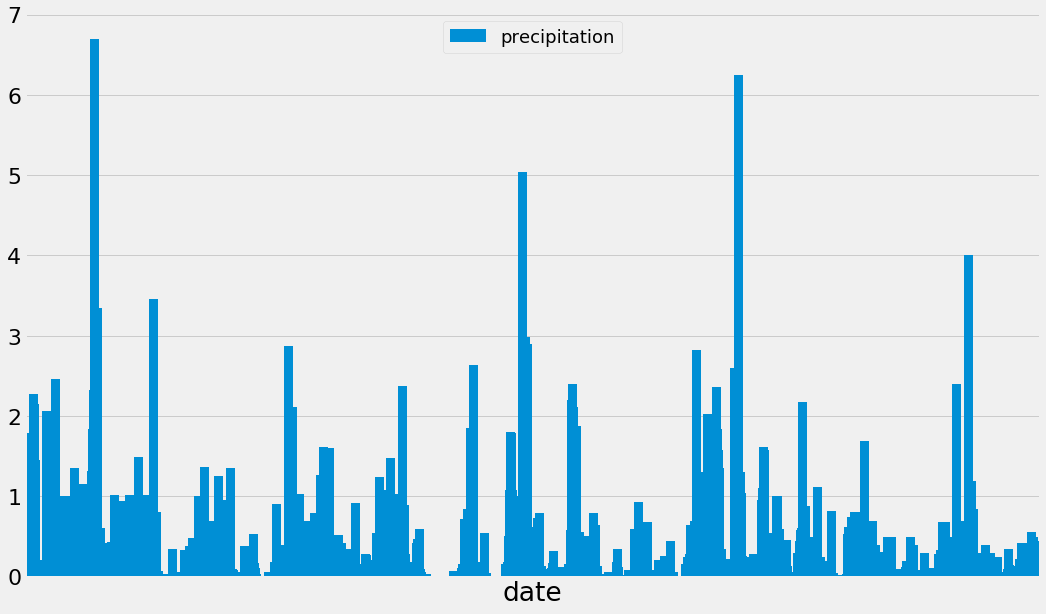

In [29]:
# Plot the bar chart for precipitation
plt.rcParams['figure.figsize'] = (15, 9)
plt.rcParams.update({'font.size': 22})
climate_plot = prcp_df.plot.bar(width=20)
climate_plot.set_xlabel("date")
climate_plot.legend(loc="upper center", prop={'size': 18})
plt.xticks([])
plt.grid(True)

plt.tight_layout()
plt.show()

In [30]:
# summary statistics for the precipitation data
summary_statistics = prcp_df.describe()
summary_statistics

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
# Number of available stations
st_sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
stations = session.query(*st_sel).distinct()
number_of_stations = stations.count()
number_of_stations

9

In [32]:
# List of the most active stations (i.e. what stations have the most rows) in descending order
sql = "select station, count(date) from measurement group by station order by count(date) desc"
active_stations = engine.execute(sql).fetchall()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Calculate the lowest, highest, and average temperatures for the most active station
most_active_station = active_stations[0][0]
sql = "select min(tobs), max(tobs), avg(tobs) from measurement where station = :most_active_station"
engine.execute(sql, most_active_station).fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [38]:
# Choose the station with the highest number of temperature observations.
# Station with the highest number of temperature observations - most data points over all
sql = "select station, count(tobs) from measurement group by station order by count(tobs) desc limit(1)"
station_with_most_temp_ovservations = engine.execute(sql).first()[0]
station_with_most_temp_ovservations

'USC00519281'

<Figure size 1080x648 with 0 Axes>

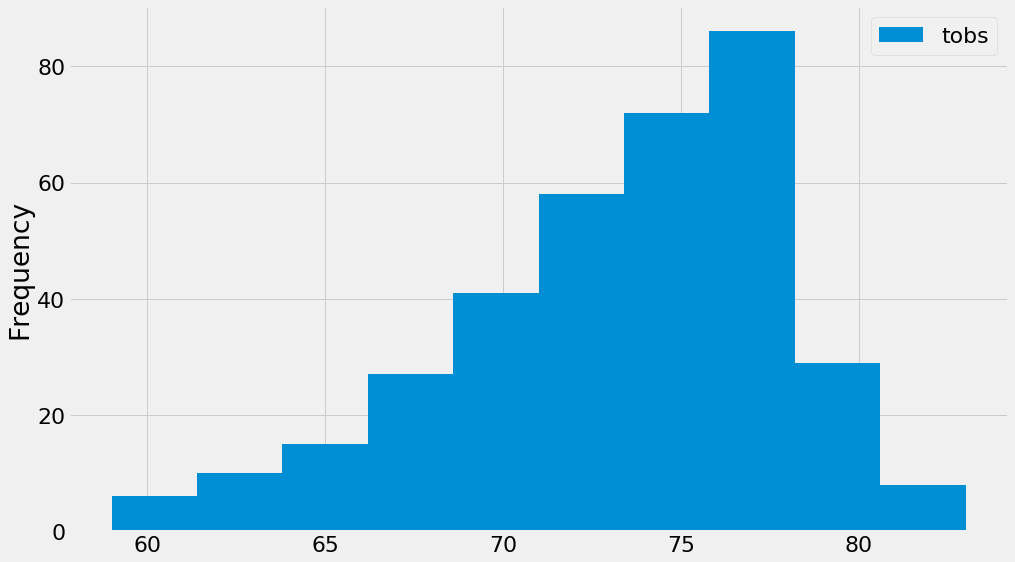

In [39]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sql = "select tobs from measurement where station = :station_with_most_temp_ovservatioms and date > :start_date"
temperatures = engine.execute(sql, [station_with_most_temp_ovservations, start_date]).fetchall()
temperatures_df = pd.DataFrame(temperatures, columns=["tobs"])
plt.figure();
temperatures_df.plot.hist()

plt.show()

In [42]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [43]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2012-02-28', '2012-03-05')
temps_df = pd.DataFrame(temps, columns=['tmin', 'tavg', 'tmax'])
temps_df

,tmin,tavg,tmax
0,62.0,69.571429,74.0


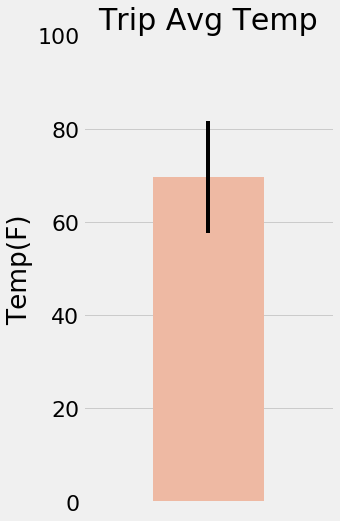

In [44]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y_error = temps_df['tmax'] - temps_df['tmin']
temps_df[['tavg']].plot(kind='bar', yerr=y_error, figsize=(4,8), color='#EEB9A3', width=0.4, legend=False)

plt.title("Trip Avg Temp", fontsize=30)
plt.ylabel("Temp(F)")
plt.ylim(0, 100)
plt.xticks([])
plt.grid(axis='x')

plt.show()

In [32]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [45]:
# This function called `calc_rainfall` will accept start date and end date in the format of '%Y-%m-%d',
# and return the total rainfall info for the date range in previous year 
# with weather station info

def calc_rainfall(start_date, end_date):
    """RSUM for a list of date range for the previous year.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d, '2012-02-28'
        end_date (string): A date string in the format %Y-%m-%d, '2012-03-05'
        
    Returns:
        RSUM, station, name, latitude, longitude, and elevation
    """
    days_ago = 365
    s_date = dt.datetime.strptime(start_date, '%Y-%m-%d') - dt.timedelta(days = days_ago)
    e_date = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.timedelta(days = days_ago)
   
    
    sel = [Station.station, 
           Station.name,
           Station.latitude, 
           Station.longitude, 
           Station.elevation,
           func.round(func.avg(Measurement.prcp), 2)]

    return session.query(*sel).filter(Measurement.date >= s_date).\
            filter(Measurement.date <= e_date).\
            filter(Measurement.station == Station.station).\
            group_by(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
            order_by(func.sum(Measurement.prcp).desc()).all()

# function usage example
print(calc_rainfall('2018-7-22', '2018-07-31'))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.36), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.22), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.15), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.1), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.01), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.01), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.01)]


## Optional Challenge Assignment

In [46]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [47]:
## Function to calculate the daily normals

def daily_normals_for_days(start_date, end_date):
    """Return daily normals from start_date to end_date.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d, '2012-02-28'
        end_date (string): A date string in the format %Y-%m-%d, '2012-03-05'
        
    Returns:
        List contains daily normals, each list element is a tuple (date, TMIN, TAVG, TMAX), the format of date is %m-%d
    """
    
    normals = []
    
    # Calculate number of days between start_date and end_date
    d = dt.datetime.strptime(end_date, '%Y-%m-%d') - dt.datetime.strptime(start_date, '%Y-%m-%d')
    number_of_days = int(d.days)
    
    # Get the dates between the start_date and end_date
    date_list = [dt.datetime.strptime(start_date, '%Y-%m-%d') + dt.timedelta(days=x) for x in range(0, number_of_days+1)]
    
    # Change the format of the dates to %m-%d
    date_list = [x.strftime('%m-%d') for x in date_list]
    
    for date in date_list:
        temp = [date]
        for normal in daily_normals(date)[0]:
            temp.append(normal)
        normals.append(tuple(temp))
    return normals

daily_normals_for_days('2018-7-22', '2018-07-31')

[('07-22', 69.0, 75.78846153846153, 81.0),
 ('07-23', 70.0, 76.20370370370371, 84.0),
 ('07-24', 69.0, 76.55555555555556, 81.0),
 ('07-25', 67.0, 76.89090909090909, 84.0),
 ('07-26', 71.0, 76.4423076923077, 86.0),
 ('07-27', 68.0, 76.58181818181818, 83.0),
 ('07-28', 69.0, 76.46428571428571, 82.0),
 ('07-29', 69.0, 76.47058823529412, 83.0),
 ('07-30', 69.0, 77.35185185185185, 84.0),
 ('07-31', 72.0, 77.03571428571429, 83.0)]

In [48]:
daily_normails = daily_normals_for_days('2017-07-22', '2017-07-31')

In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df = pd.DataFrame(daily_normails, columns=['date', 'tmin', 'tavg', 'tmax'])  
daily_normals_df_with_index = daily_normals_df.set_index('date')
daily_normals_df

,date,tmin,tavg,tmax
0,07-22,69.0,75.788462,81.0
1,07-23,70.0,76.203704,84.0
2,07-24,69.0,76.555556,81.0
3,07-25,67.0,76.890909,84.0
4,07-26,71.0,76.442308,86.0
5,07-27,68.0,76.581818,83.0
6,07-28,69.0,76.464286,82.0
7,07-29,69.0,76.470588,83.0
8,07-30,69.0,77.351852,84.0
9,07-31,72.0,77.035714,83.0


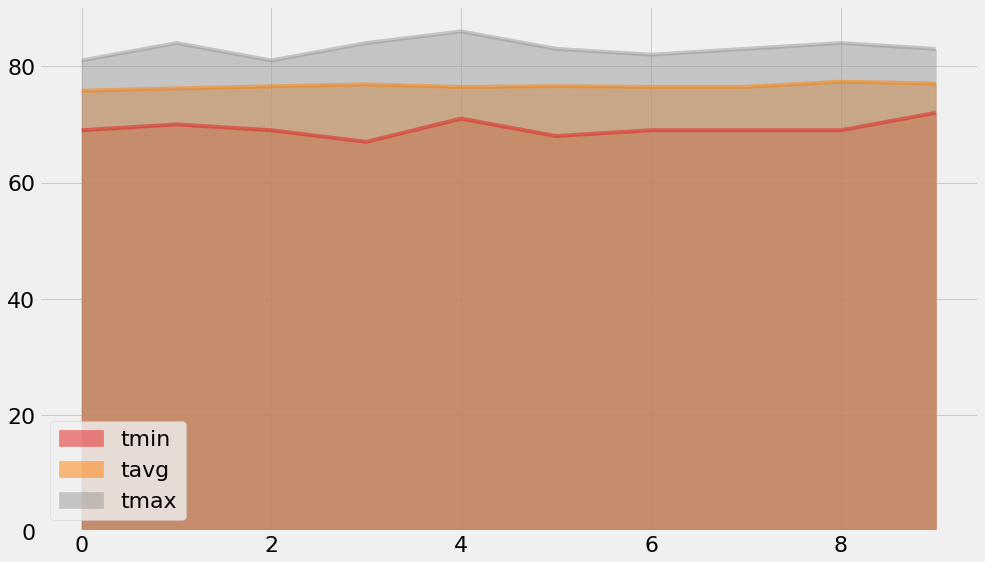

In [51]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', stacked=False, colormap='Set1')
plt.xlabel='date'
plt.grid(True)
plt.show()